# **Employee Attrition Prediction**

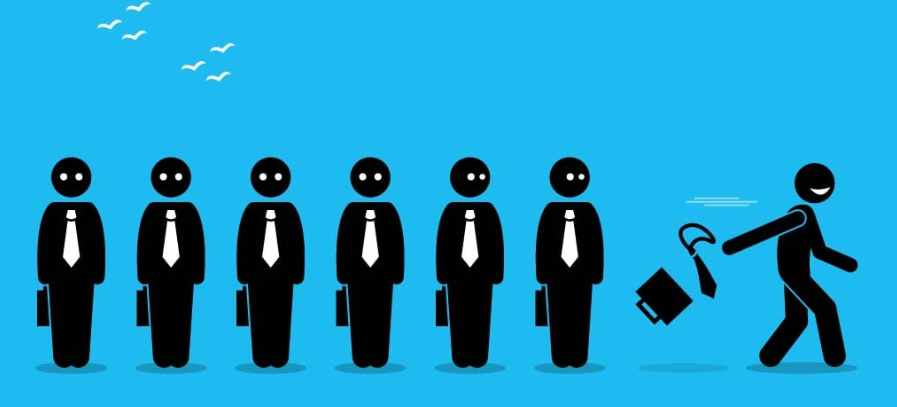

**Here's a clear explanation of the dataset columns**

* **Education**
  * Type: Ordinal (Integer: 1 to 5)
  * Meaning:
    * 1 - Below College, 2 - College, 3 - Bachelor, 4 - Master, 5 - Doctor

* **EnvironmentSatisfaction:** Reflects how satisfied an employee is with their work environment (facilities, culture, infrastructure). Low satisfaction can be a driver for attrition.
  * Type: Ordinal (Integer: 1 to 4)
  * Meaning: 1 - Low, 2 - Medium, 3 - High, 4 - Ver High

* **JobInvolvement:** Indicates how engaged or emotionally invested an employee is in their job.
  * Type: Ordinal (Integer: 1 to 4)
  * Meaning: 1 - Low, 2 - Medium, 3 - High, 4 - Ver High

* **PerformanceRating:** This rating is often skewed toward high values in this dataset, meaning most employees are rated highly.
  * Type: Ordinal (Integer: 1 to 4)
  * Meaning: 1 - Low, 2 - Medium, 3 - High, 4 - Ver High

* **RelationshipSatisfaction:** Reflects satisfaction with colleague relationships or team dynamics. Lower scores may suggest internal conflicts or dissatisfaction.
  * Type: Ordinal (Integer: 1 to 4)
  * Meaning: 1 - Low, 2 - Medium, 3 - High, 4 - Ver High
  
* **TrainingTimesLastYear:** Can indicate how well the employee is being upskilled. Both too little or excessive training can impact attrition.
  * Type: Ordinal (Integer: 0 to ~6)
  * Meaning:
    * Number of times the employee received training in the last year.
    
* **WorkLifeBalance:** Captures employee sentiment toward balancing personal and professional life. A major factor in retaining talent.
  * Type: Ordinal (Integer: 1 to 4)
  * Meaning: 1 - Low, 2 - Medium, 3 - High, 4 - Ver High




# **1. Install and Load Libraries and dataset**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
df=pd.read_csv("/content/drive/MyDrive/FSDS @Kodi Senapati/Colab files/MachineLearning/Projects/Datasets/HR-Employee-Attrition.csv")

print(df.columns)
print(len(df.columns))

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
35


# **2. Data Cleaning**

### **A. Drop constant & Irrelevant columns**

In [10]:
one_col=[i for i in df.columns if df[i].nunique()==1]
for i in one_col:
  print(i)

EmployeeCount
Over18
StandardHours


**- Data Cleaning (Removing irrelevant or redundant columns)**

* Drop EmployeeCount, StandardHours and Over18 (same for all, no use).
* Drop EmployeeNumber (unique identifier, not useful for modeling).

In [11]:
#Finding the columns that has only 1 value all over the data

df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

print(df.columns)
print(len(df.columns))

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
31


### **B. Check for datatype and value consistency**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [13]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


### **C. Check for Null Values and handle them if any & Delete duplicates**

In [14]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [15]:
df.drop_duplicates(inplace=True)

# **3. Statistical Tests**

In [16]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [17]:
# Find Categorical & Numerical values

categorical_col = df.select_dtypes(include=['object']).columns.tolist()
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_col)
print(len(categorical_col))
print("Numerical Columns:", numerical_col)
print(len(numerical_col))

Categorical Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
8
Numerical Columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
23


### **A. Chi-Square Test for categorical vs Attrition (Target)**

In [18]:
from scipy.stats import chi2_contingency
pd.crosstab(df['BusinessTravel'], df['Attrition'])
chi2_contingency(pd.crosstab(df['BusinessTravel'], df['Attrition']))

Chi2ContingencyResult(statistic=np.float64(24.182413685655174), pvalue=np.float64(5.608614476449931e-06), dof=2, expected_freq=array([[125.81632653,  24.18367347],
       [232.34081633,  44.65918367],
       [874.84285714, 168.15714286]]))

In [19]:
def chi_square_test(df, target='Attrition', alpha=0.05):
  results=[]
  for col in categorical_col:
    contingency_table = pd.crosstab(df[col], df[target])

    # Handle edge case where column has only one category
    if contingency_table.shape[0] < 2:
      p_val=None
      conclusion="Only one category - Drop"
    else:
      chi2, p, dof, expected = chi2_contingency(contingency_table)
      conclusion = "Keep" if p < alpha else "Drop"
      p_val = round(p, 6)

    results.append({
        'Feature':col,
        'p-value':p_val,
        'Conclusion':conclusion
        })
  return pd.DataFrame(results).sort_values(by='p-value', na_position='last')

# Example usage
chi_square_results = chi_square_test(df)
print(chi_square_results)



          Feature   p-value Conclusion
0       Attrition  0.000000       Keep
7        OverTime  0.000000       Keep
6   MaritalStatus  0.000000       Keep
5         JobRole  0.000000       Keep
1  BusinessTravel  0.000006       Keep
2      Department  0.004526       Keep
3  EducationField  0.006774       Keep
4          Gender  0.290572       Drop


**Interpretation(Gender):**

The p-value=0.290572 is much greater than 0.05, which means
* There is no statistically significant relationship between Gender & Attrition
* Statistically, gender does not influence attrition in your dataset.

**The p-value from the Chi-Square test was 0.29 (> 0.05), indicating that Gender is not statistically associated with employee attrition. Thus, it doesn't add meaningful predictive power to the model and can be dropped to improve model focus and simplicity.**

***Note:*** I have noticed hat converting Attrition from categorical ("Yes"/"No") to numerical (1/0) does not affect the p-values of the chi-square test — and here's why:

* The Chi-Square Test Works on Frequencies, Not Actual Values
* The chi-square test evaluates whether there's a statistically significant association between two categorical variables by comparing observed vs. expected frequencies in a contingency table.
* Whether the target is labeled as 'Yes'/'No' or 1/0, the underlying counts in the contingency table remain the same.

In [20]:
df.drop(columns=['Gender'], axis=1, inplace=True)

print(df.columns)
print(len(df.columns))

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
30


In [21]:
# Find Categorical & Numerical values

categorical_col = df.select_dtypes(include=['object']).columns.tolist()
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_col)
print(len(categorical_col))
print("Numerical Columns:", numerical_col)
print(len(numerical_col))

Categorical Columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']
7
Numerical Columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
23


### **B. T-test for numeric vs Attrition**

In [22]:
from scipy.stats import ttest_ind
import pandas as pd

def t_test_all(df, target='Attrition', alpha=0.05):
  results=[]

  for col in numerical_col:
    group_yes = df[df[target]== 'Yes'][col]
    group_no = df[df[target]== 'No'][col]

    # Handle zero variance columns
    if group_yes.std() == 0 and group_no.std() == 0:
      p_val = None
      conclusion = "Drop - No Variation"

    else:
      stat, p = ttest_ind(group_yes, group_no, equal_var=False)  # Welch's t-test
      p_val = round(p, 6)
      if p < alpha:
        conclusion='Keep'
      else:
        conclusion = "Drop"

    results.append({
            'Feature': col,
            'p-value': p_val,
            'Conclusion': conclusion,
        })

  return pd.DataFrame(results).sort_values(by='p-value', na_position='last')


t_test_results = t_test_all(df)
print(t_test_results[['Feature', 'p-value', 'Conclusion']])


                     Feature   p-value Conclusion
0                        Age  0.000000       Keep
7                   JobLevel  0.000000       Keep
15          StockOptionLevel  0.000000       Keep
9              MonthlyIncome  0.000000       Keep
20        YearsInCurrentRole  0.000000       Keep
22      YearsWithCurrManager  0.000000       Keep
19            YearsAtCompany  0.000000       Keep
16         TotalWorkingYears  0.000000       Keep
6             JobInvolvement  0.000005       Keep
8            JobSatisfaction  0.000105       Keep
4    EnvironmentSatisfaction  0.000209       Keep
2           DistanceFromHome  0.004137       Keep
17     TrainingTimesLastYear  0.020364       Keep
1                  DailyRate  0.030040       Keep
18           WorkLifeBalance  0.030466       Keep
14  RelationshipSatisfaction  0.089728       Drop
11        NumCompaniesWorked  0.116334       Drop
21   YearsSinceLastPromotion  0.198651       Drop
3                  Education  0.224171       Drop


***Note:*** We cant rely solely on p-values to "Drop" features. That doesn't mean the feature is useless. But, this feature may not be signifiantly different accross classes by itself. Consider deprioritizingit, or review further during modeling.

# **4. Data Storytelling/Exploratory Data Analysis (EDA)**

### **A. Data Storytelling**

In [24]:
# Total Employees
total_employees=df.shape[0]
print(f"Total Employees:{total_employees}")

#Attrition Rate
attrition_rate=df[df['Attrition']=='Yes'].shape[0]
print(f'Attrition Rate:{attrition_rate}')

#Average Age
avg_age=df['Age'].mean()
print(f"Average Age:{avg_age:.0f}")

#Average Monthly Income
avg_mon_inc=df['MonthlyIncome'].mean()
print(f"Average Monthly Income:{avg_mon_inc:.2f}")

#Average Years at Company
avg_yrs_com=df['YearsAtCompany'].mean()
print(f"Average Years At Company:{avg_yrs_com:.2f}")

Total Employees:1470
Attrition Rate:237
Average Age:37
Average Monthly Income:6502.93
Average Years At Company:7.01


In [25]:
print(f'''Our organization has {total_employees} employees.
Out of them, {attrition_rate} employees have left the company, indicating potential retention issues.
The average employee is {avg_age:.0f} years old, earns around ₹{avg_mon_inc:.0f}, and stays for about {avg_yrs_com:.1f} years.
''')

Our organization has 1470 employees.
Out of them, 237 employees have left the company, indicating potential retention issues.
The average employee is 37 years old, earns around ₹6503, and stays for about 7.0 years.



### **B. Categorical Features (Countplot)**

In [26]:
print(categorical_col)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']


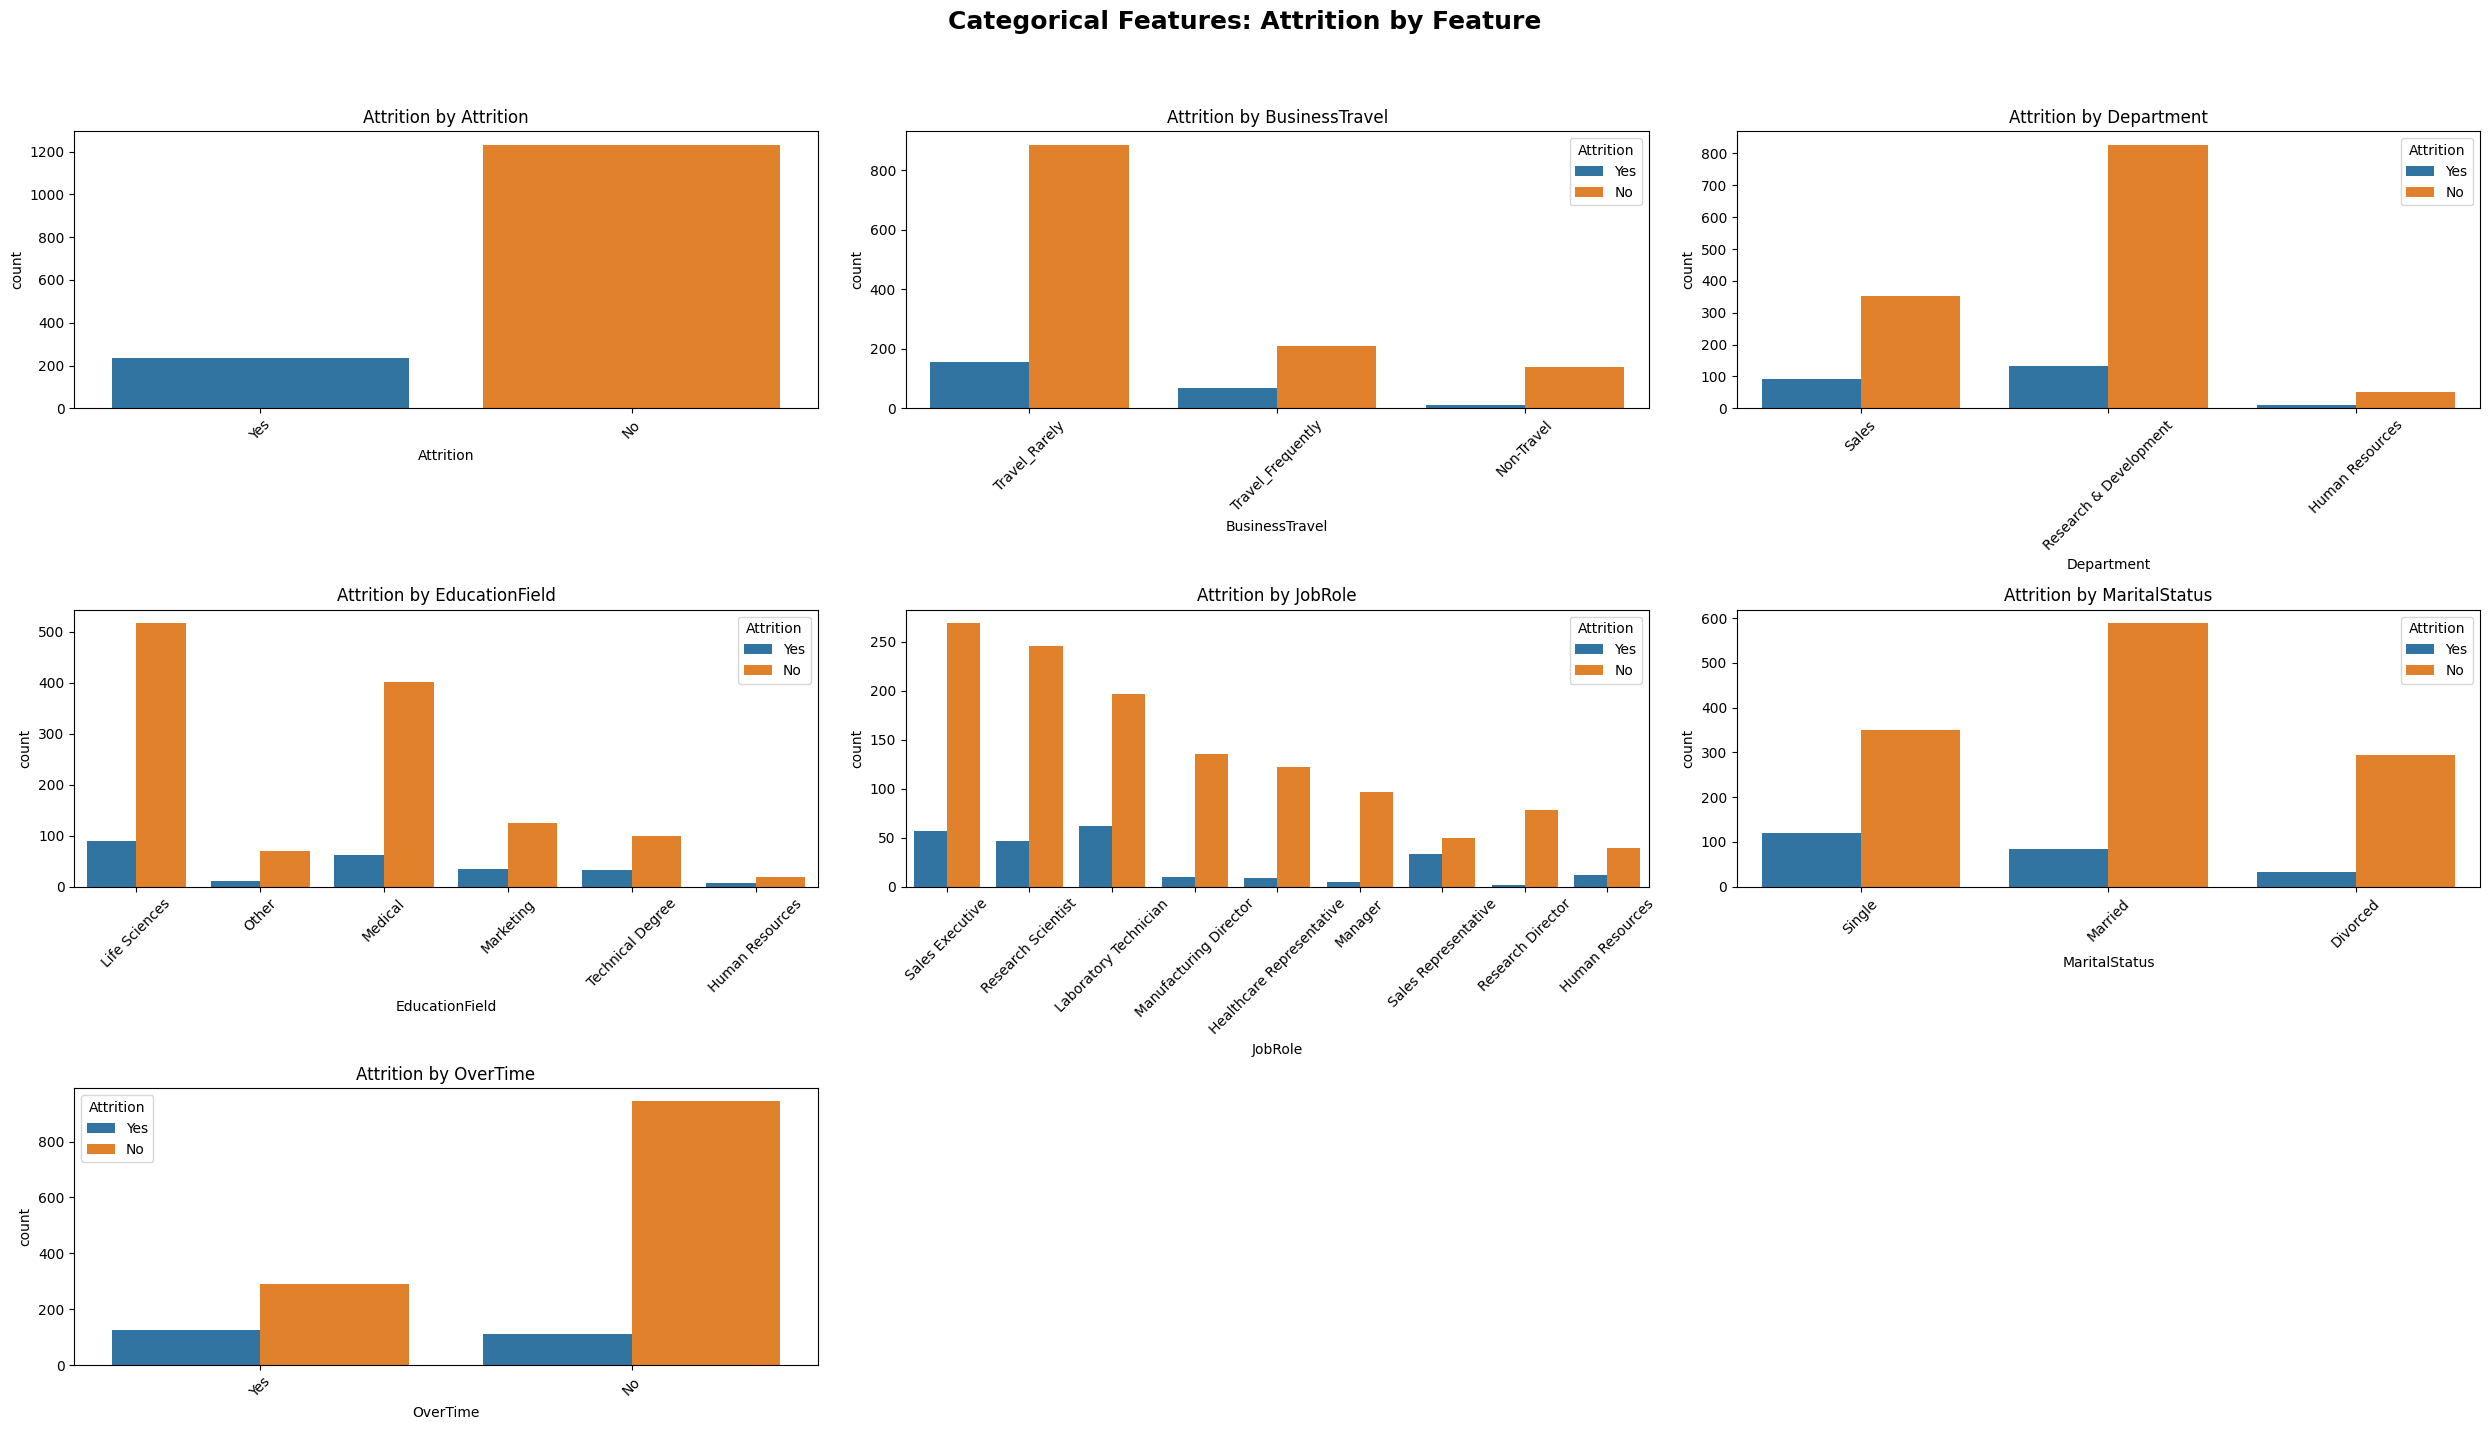

In [27]:
import math

n_cols=3
n_rows=math.ceil(len(categorical_col)/n_cols)

plt.figure(figsize=(25, 5*n_rows))
plt.suptitle("Categorical Features: Attrition by Feature", fontsize=18, fontweight='bold')
for i, col in enumerate(categorical_col, 1):
  plt.subplot(n_rows, n_cols, i)
  sns.countplot(data=df, x=col, hue='Attrition')
  plt.title(f'Attrition by {col}')
  plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### **C. Numerical Features**

In [28]:
for i in numerical_col:
  print(f"{i}:{df[i].nunique()}")


Age:43
DailyRate:886
DistanceFromHome:29
Education:5
EnvironmentSatisfaction:4
HourlyRate:71
JobInvolvement:4
JobLevel:5
JobSatisfaction:4
MonthlyIncome:1349
MonthlyRate:1427
NumCompaniesWorked:10
PercentSalaryHike:15
PerformanceRating:2
RelationshipSatisfaction:4
StockOptionLevel:4
TotalWorkingYears:40
TrainingTimesLastYear:7
WorkLifeBalance:4
YearsAtCompany:37
YearsInCurrentRole:19
YearsSinceLastPromotion:16
YearsWithCurrManager:18


**This is completely subjective and I felt keeping the target as 20 will divide my features.**

In [29]:
# Detect discrete numerical features (≤20 unique values)
discrete_numerical = [col for col in numerical_col if df[col].nunique() <= 20]
continuous_numerical = [col for col in numerical_col if col not in discrete_numerical]

print(f"Discrete Numerical Features: {discrete_numerical}")
print(f"Continuous Numerical Features: {continuous_numerical}")

Discrete Numerical Features: ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Continuous Numerical Features: ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany']


**Discrete Numerical Features (Countplot)**

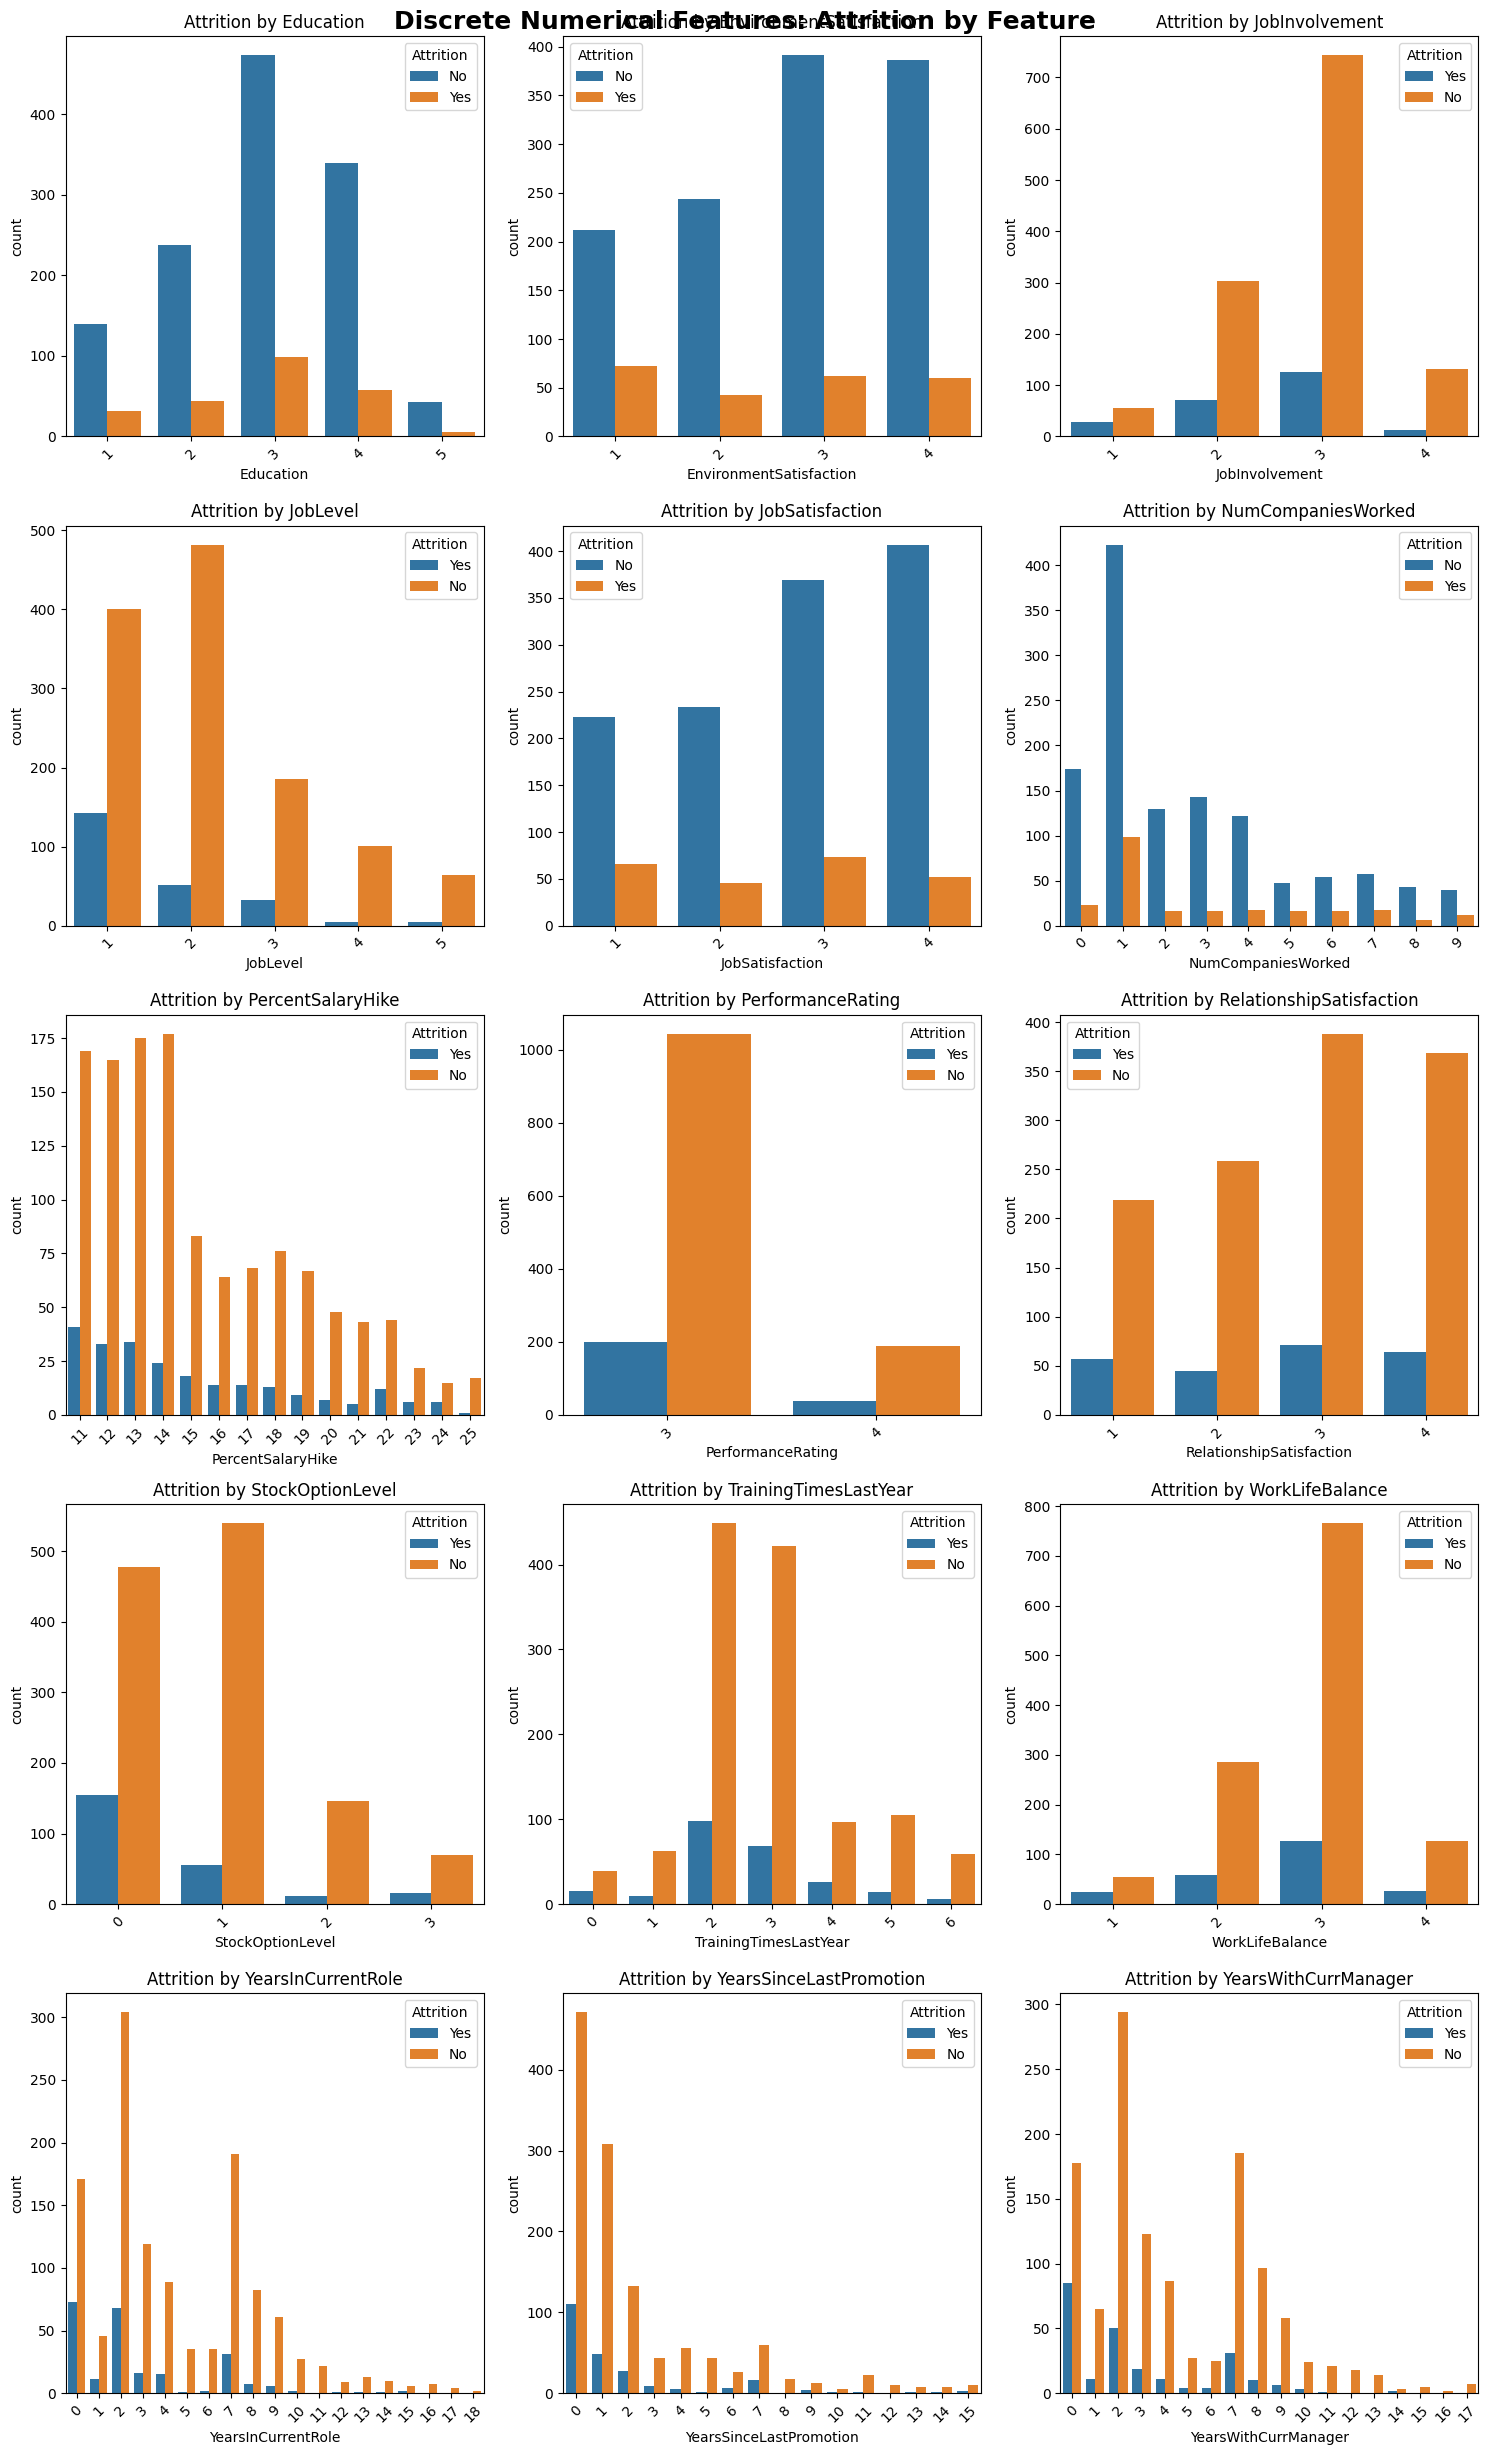

In [30]:
import math

n_cols = 3
n_rows = math.ceil(len(discrete_numerical)/n_cols)
plt.figure(figsize=(15, 5 * n_rows))
plt.suptitle("Discrete Numerical Features: Attrition by Feature", fontsize=18, fontweight='bold')
for i, col in enumerate(discrete_numerical, 1):
  plt.subplot(n_rows, n_cols, i)
  sns.countplot(data=df, x=col, hue='Attrition')
  plt.title(f'Attrition by {col}')
  plt.xticks(rotation=45)

plt.tight_layout()  # Avoid overlap with suptitle
plt.show()

**Continuous Numerical Features (Boxplot)**

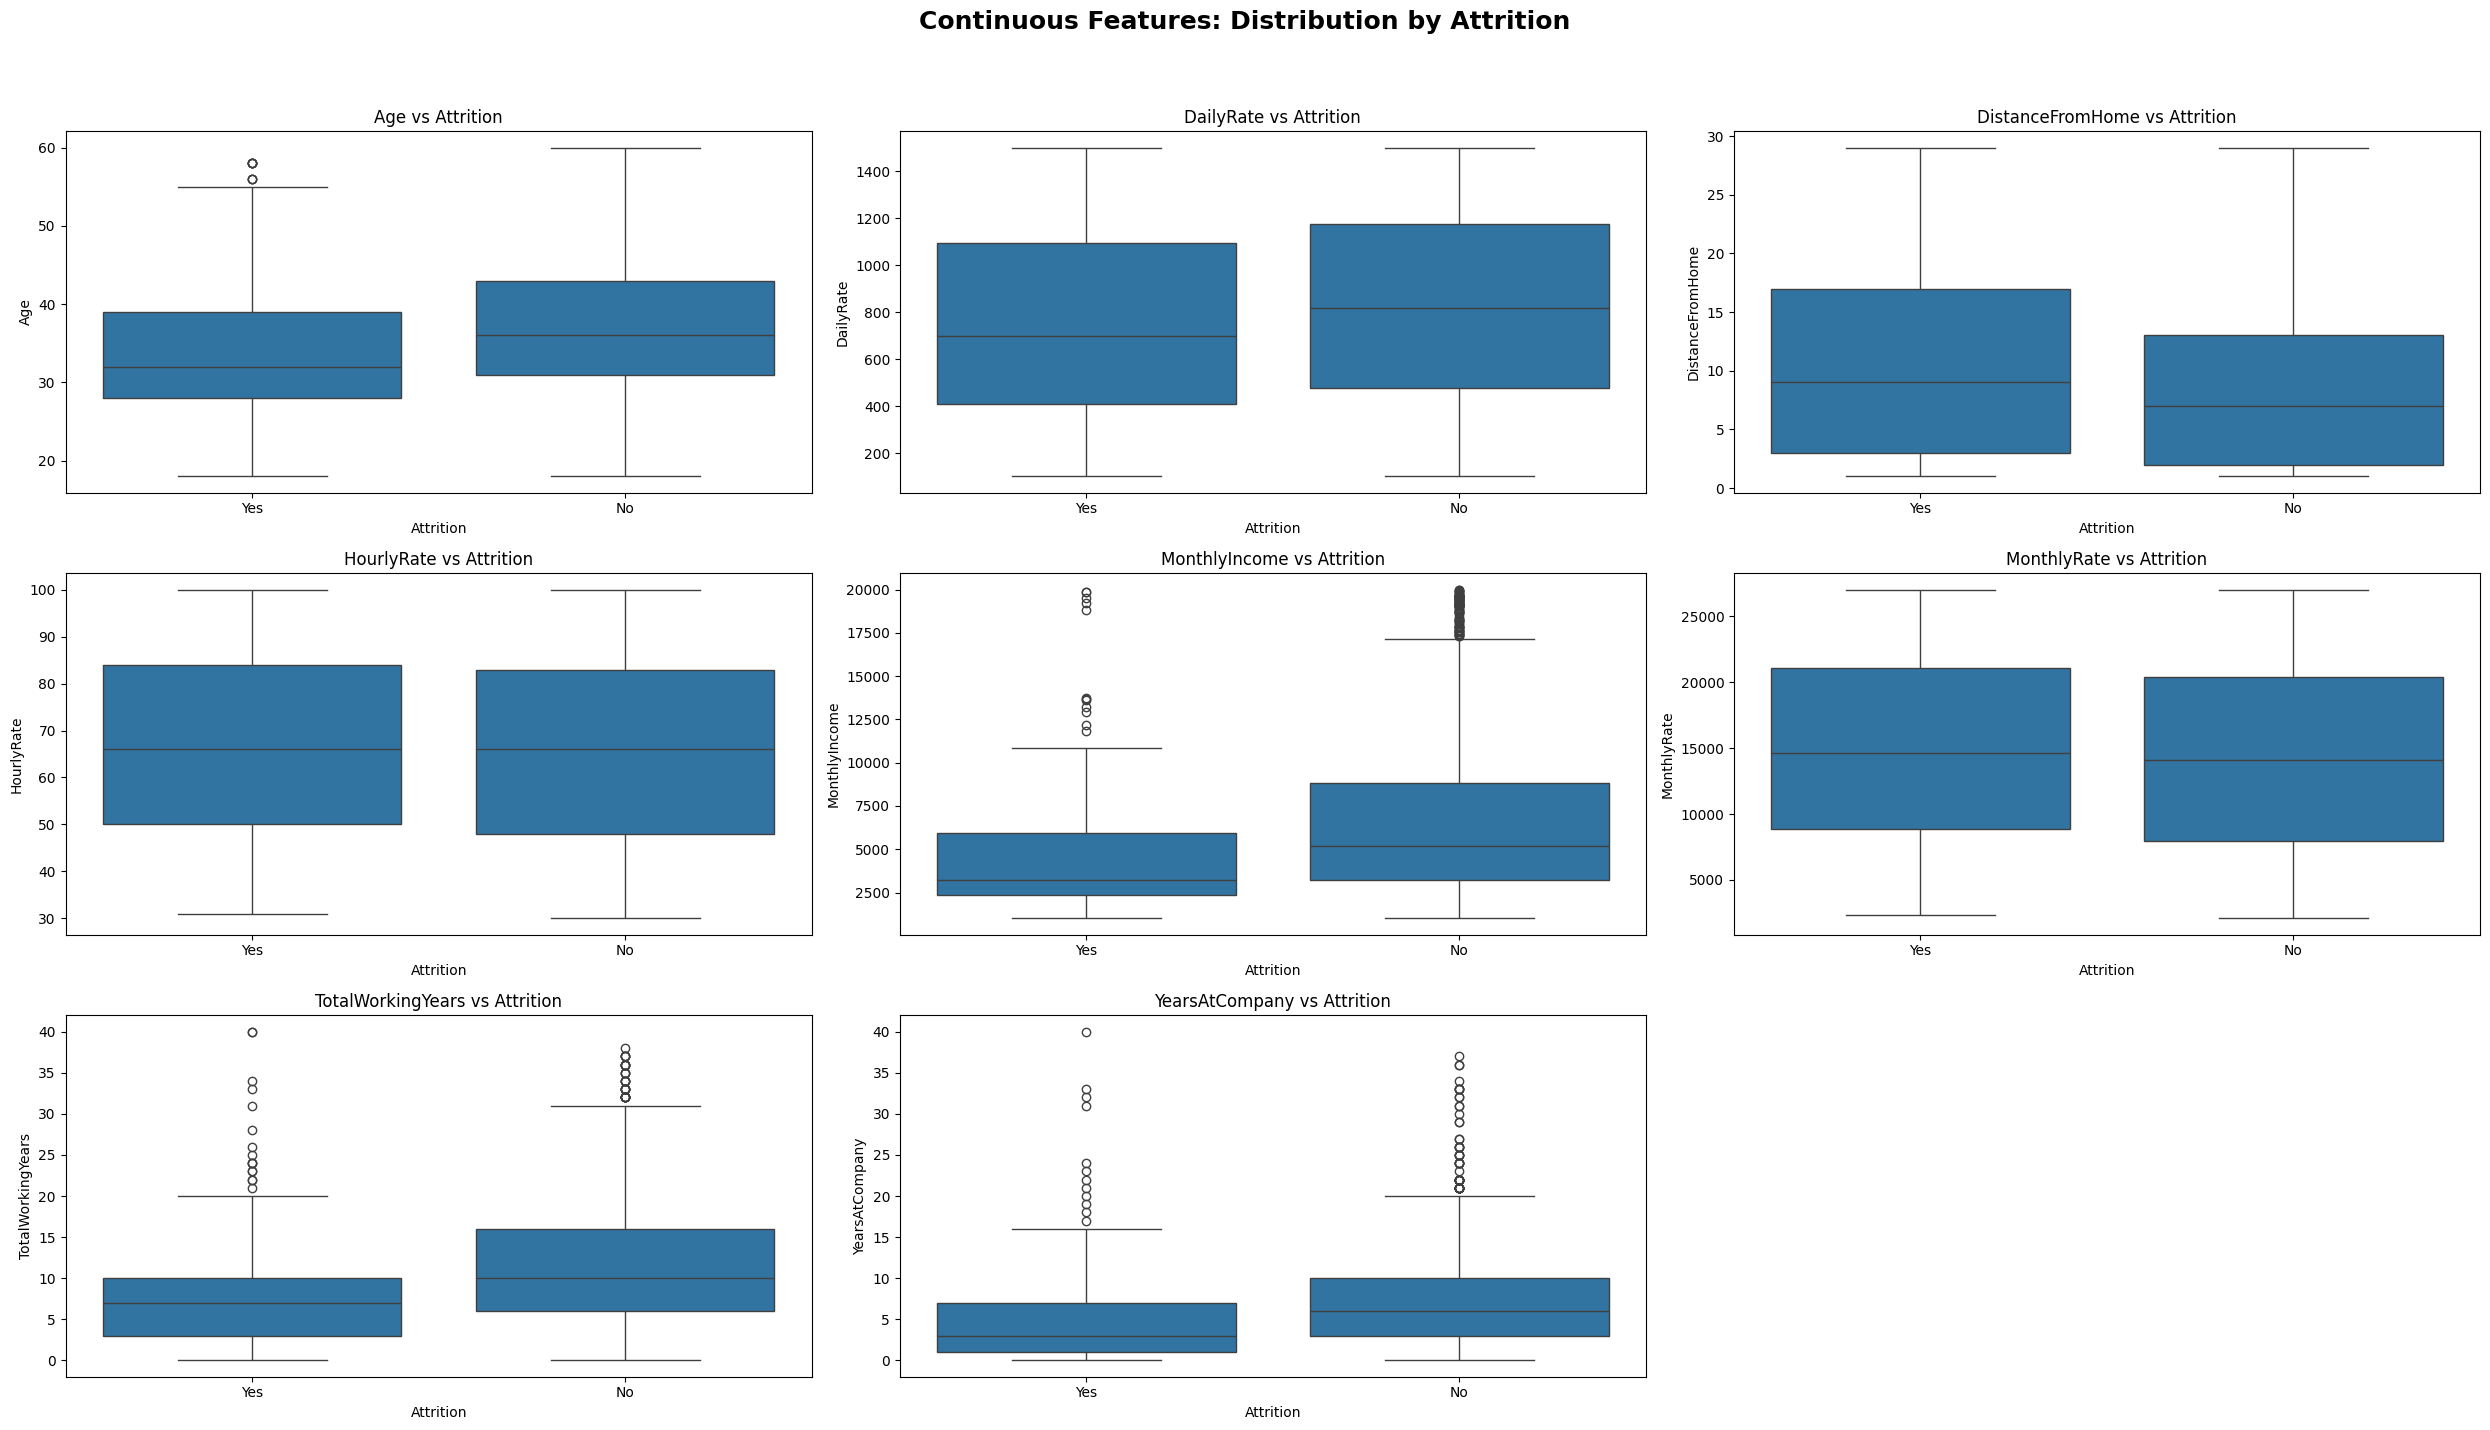

In [31]:
import math

n_cols=3
n_rows=math.ceil(len(continuous_numerical)/n_cols)

plt.figure(figsize=(25, 5 * n_rows))
plt.suptitle("Continuous Features: Distribution by Attrition", fontsize=18, fontweight='bold')
for i, col in enumerate(continuous_numerical, 1):
  plt.subplot(n_rows, n_cols, i)
  sns.boxplot(data=df, x='Attrition', y=col)
  plt.title(f'{col} vs Attrition')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## **D. Skewness Plot/Distribution Plot (Numerical values)**

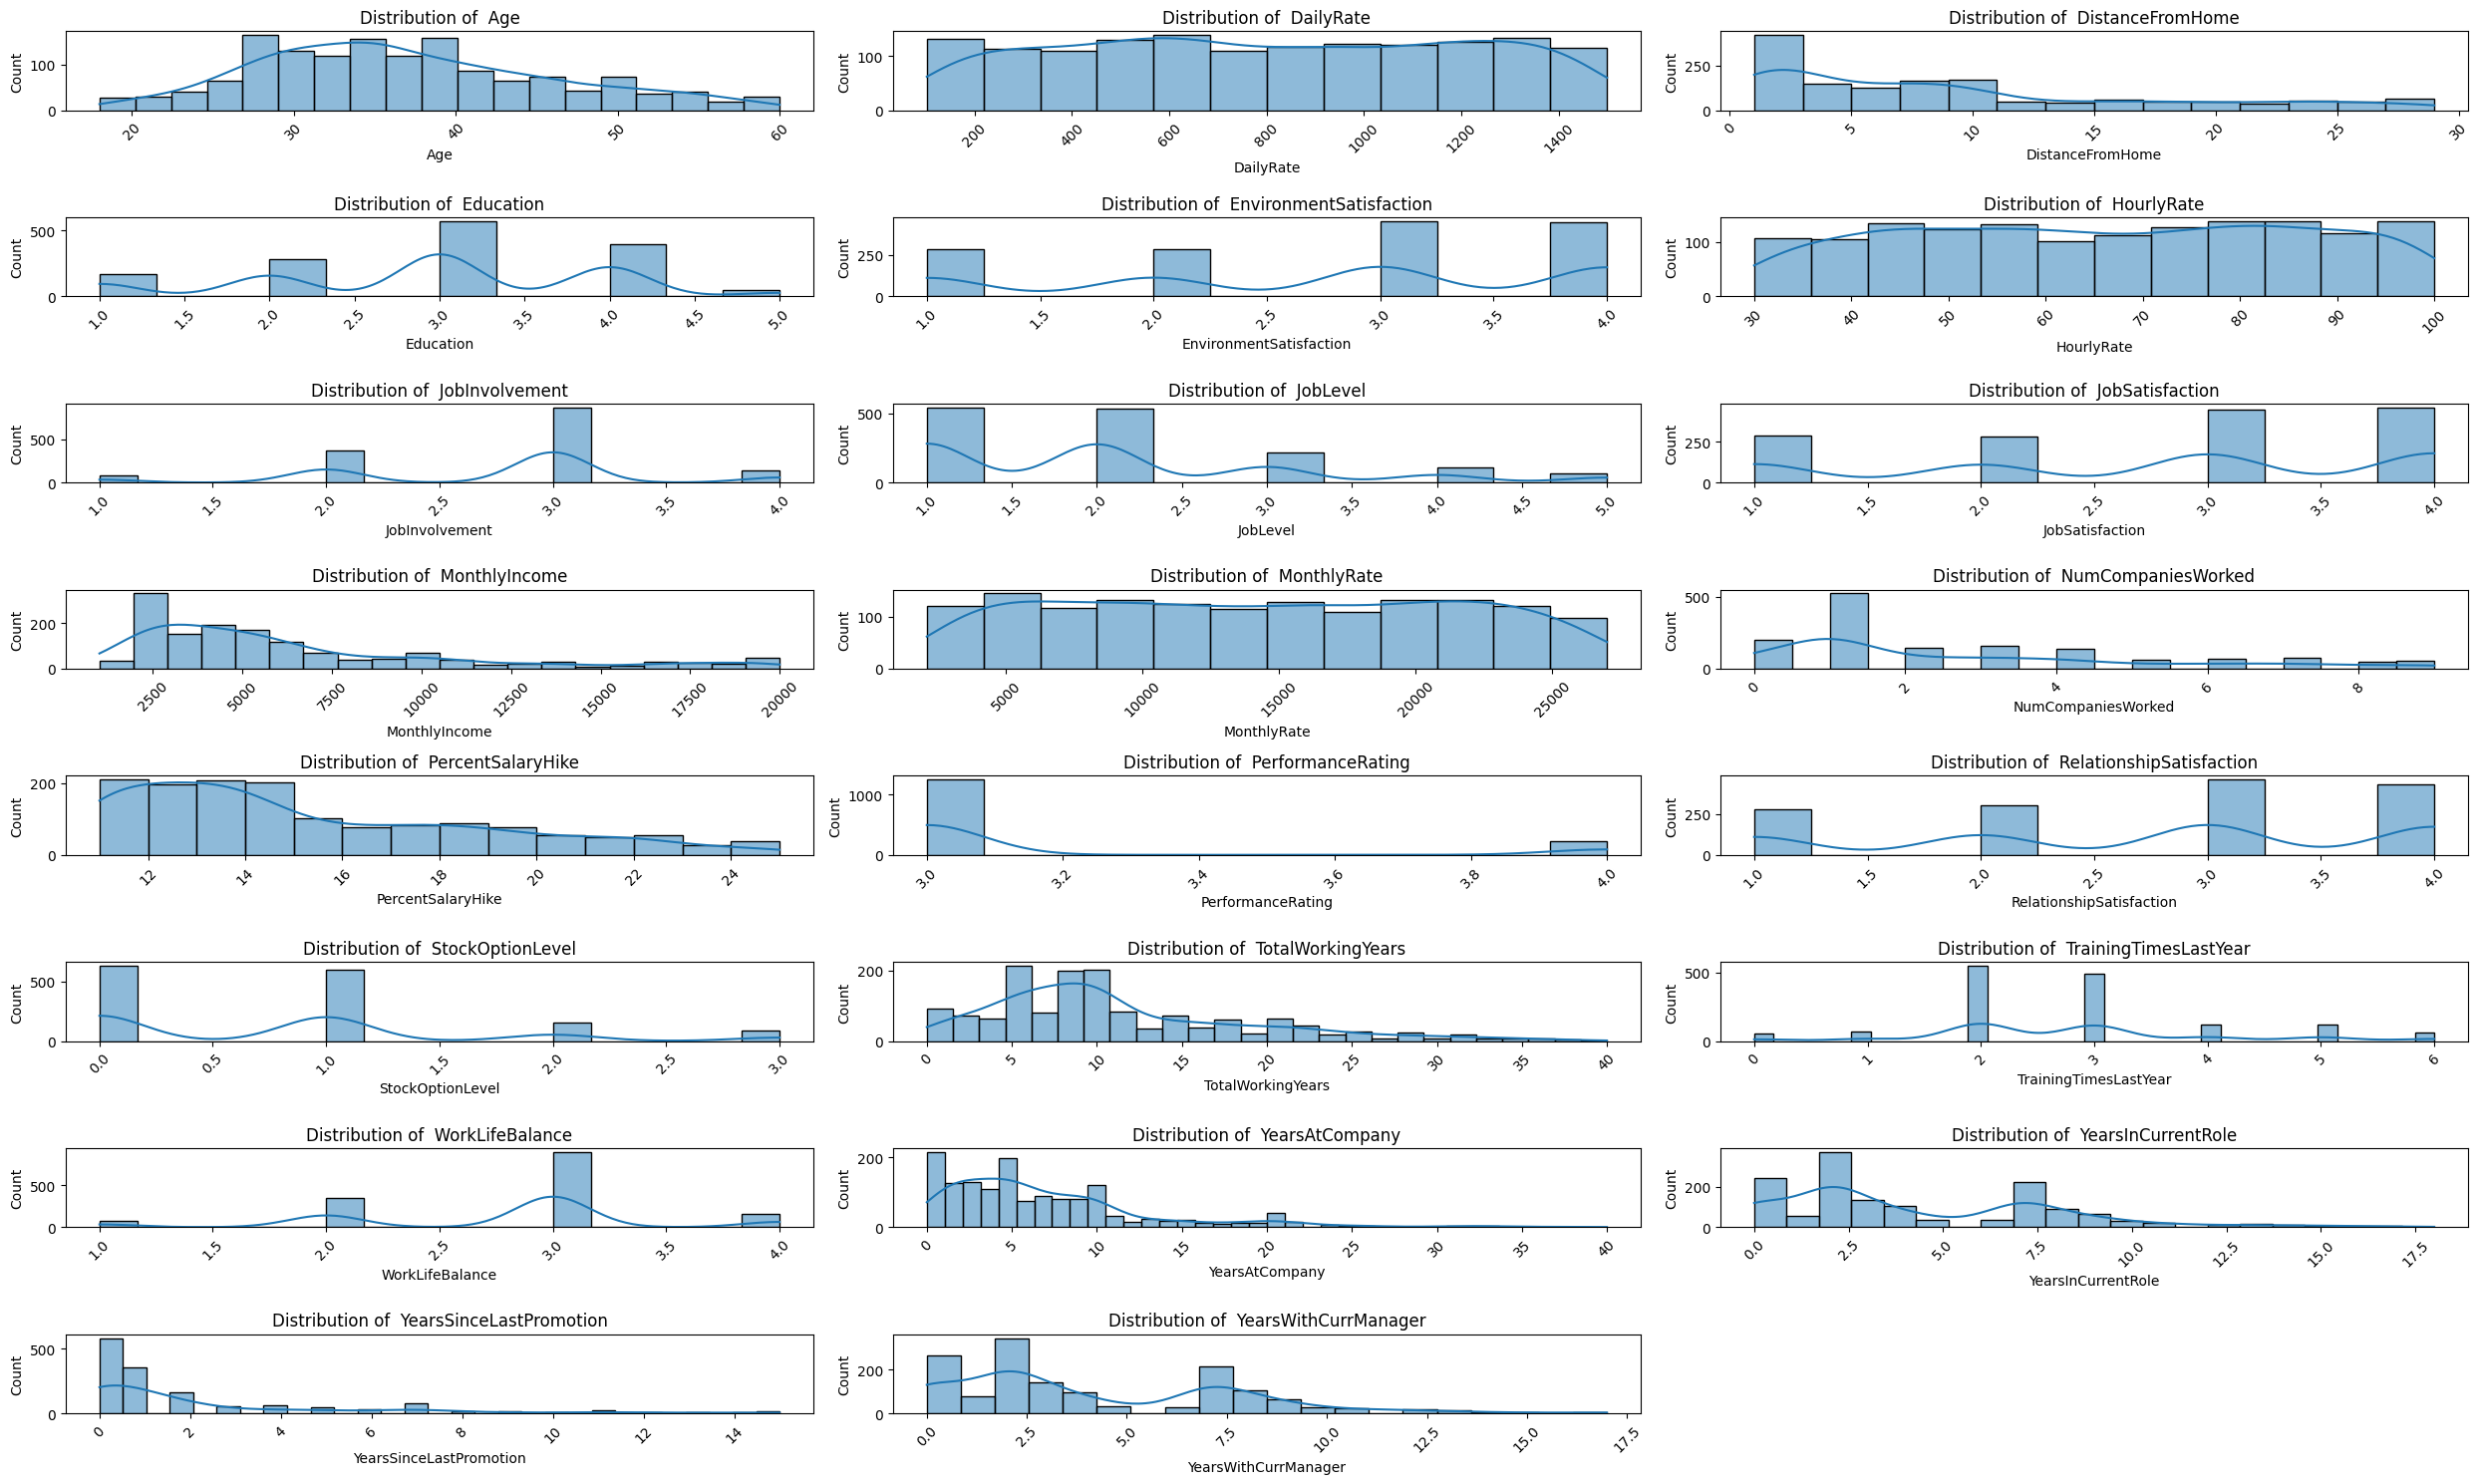

In [32]:
import math

n_cols=3
n_rows=math.ceil(len(numerical_col)/n_cols)
plt.figure(figsize=(25, 15))
for i, col in enumerate(numerical_col, 1):
  plt.subplot(n_rows, n_cols, i)
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of  {col}')
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **5. Feature Engineering**

**Note:**
Splitting into X and y before feature engineering ensures:
  * No data leakage from the target into the features.
  * Clean, modular code.
  * Easier pipeline creation for model training.


In [33]:
# 1. Split features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

print("Feature columns:",X.columns)
print(X.shape)
print("Target columns:",y.name)
print(y.shape)


Feature columns: Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
(1470, 29)
Target columns: Attrition
(1470,)


In [34]:
# Find Categorical & Numerical values for X

categorical_col = X.select_dtypes(include=['object']).columns.tolist()
numerical_col = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_col)
print(len(categorical_col))
print("Numerical Columns:", numerical_col)
print(len(numerical_col))

Categorical Columns: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']
6
Numerical Columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
23


### **A. Detect Outliers using IQR method**

In [35]:
outlier_columns = []

for col in numerical_col:
  Q1 = X[col].quantile(0.25)
  Q3 = X[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  outliers = X[(X[col] < lower) | (X[col] > upper)]

  if not outliers.empty:
    outlier_columns.append(col)
    print(f"{col}: {outliers.shape[0]} outliers")

print(f"\nColumns with outliers: {outlier_columns}")


MonthlyIncome: 114 outliers
NumCompaniesWorked: 52 outliers
PerformanceRating: 226 outliers
StockOptionLevel: 85 outliers
TotalWorkingYears: 63 outliers
TrainingTimesLastYear: 238 outliers
YearsAtCompany: 104 outliers
YearsInCurrentRole: 21 outliers
YearsSinceLastPromotion: 107 outliers
YearsWithCurrManager: 14 outliers

Columns with outliers: ['MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


**Winsorization(Capping Outliers)**

In [36]:
for col in numerical_col:
  Q1 = X[col].quantile(0.25)
  Q3 = X[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  X[col] = X[col].clip(lower=lower_bound, upper=upper_bound)

In [37]:
outlier_columns = []

for col in numerical_col:
  Q1 = X[col].quantile(0.25)
  Q3 = X[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  outliers = X[(X[col] < lower) | (X[col] > upper)]

  if not outliers.empty:
    outlier_columns.append(col)
    print(f"{col}: {outliers.shape[0]} outliers")

print(f"\nColumns with outliers: {outlier_columns}")



Columns with outliers: []


### **B. Encode Categorical Variables (One-Hot / Label Encoding as needed)**

In [38]:
for i in categorical_col:
  print(f"{i} has: {X[i].nunique()} values")
  print(f"Unique values: {X[i].unique()}")
  print("-"*40)

BusinessTravel has: 3 values
Unique values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
----------------------------------------
Department has: 3 values
Unique values: ['Sales' 'Research & Development' 'Human Resources']
----------------------------------------
EducationField has: 6 values
Unique values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
----------------------------------------
JobRole has: 9 values
Unique values: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
----------------------------------------
MaritalStatus has: 3 values
Unique values: ['Single' 'Married' 'Divorced']
----------------------------------------
OverTime has: 2 values
Unique values: ['Yes' 'No']
----------------------------------------


**Understanding Types of Categorical Variables**

1. Nominal(No Natural order):
  *  MaritalStatus: ['Single' 'Married' 'Divorced']
  * BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
  * Department: ['Sales' 'Research & Development' 'Human Resources']
  * EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
  * JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

2. Binary Label Encoding(Yes/No)
  * OverTime has: ['Yes' 'No']

In [39]:
# Initially Ill convert y-taget variable
print(y.dtype)
y=y.map({'Yes': 1, 'No':0})
print(y.unique())
print(y.dtype)

object
[1 0]
int64


In [40]:
# From feature columns as 'OverTime is binary perform above steps'

print(X['OverTime'].dtype)
X['OverTime']=X['OverTime'].map({'Yes': 1, 'No':0})
print(X['OverTime'].unique())
print(X['OverTime'].dtype)

object
[1 0]
int64


In [41]:
# Encode the multiple columns

multi_col=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

print("Before Encoding")
print('--'*40)
for i in multi_col:
  print(f'{i}-datatype:{X[i].dtype}')

# One-Hot Encoding
X=pd.get_dummies(X, columns=multi_col, dtype=int, drop_first=True)

Before Encoding
--------------------------------------------------------------------------------
BusinessTravel-datatype:object
Department-datatype:object
EducationField-datatype:object
JobRole-datatype:object
MaritalStatus-datatype:object


In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   DailyRate                          1470 non-null   int64  
 2   DistanceFromHome                   1470 non-null   int64  
 3   Education                          1470 non-null   int64  
 4   EnvironmentSatisfaction            1470 non-null   int64  
 5   HourlyRate                         1470 non-null   int64  
 6   JobInvolvement                     1470 non-null   int64  
 7   JobLevel                           1470 non-null   int64  
 8   JobSatisfaction                    1470 non-null   int64  
 9   MonthlyIncome                      1470 non-null   int64  
 10  MonthlyRate                        1470 non-null   int64  
 11  NumCompaniesWorked                 1470 non-null   float

**Applying Winsorization to treat outliers is exactly why we are seeing float values in originally integer based columns**

* 1. Round & Convert Back (Recommended for count-like features)
* 2. Leave as-is (if the values are truly continuous, like salaries, age, etc.)


In [43]:
A=['NumCompaniesWorked', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']

for i in A:
  print(i)
  print(X[i].unique())

NumCompaniesWorked
[8.  1.  6.  8.5 0.  4.  5.  2.  7.  3. ]
StockOptionLevel
[0.  1.  2.5 2. ]
TotalWorkingYears
[ 8.  10.   7.   6.  12.   1.  17.   5.   3.  28.5 13.   0.  26.  24.
 22.   9.  19.   2.  23.  14.  15.   4.  28.  21.  25.  20.  11.  16.
 18.  27. ]
TrainingTimesLastYear
[0.5 3.  2.  4.5 1.  4. ]
YearsInCurrentRole
[ 4.   7.   0.   2.   5.   9.   8.   3.   6.  13.   1.  14.5 14.  11.
 10.  12. ]
YearsSinceLastPromotion
[0.  1.  3.  2.  7.  4.  7.5 6.  5. ]
YearsWithCurrManager
[ 5.   7.   0.   2.   6.   8.   3.  11.  14.5  1.   4.  12.   9.  10.
 13.  14. ]


**Option 2 makes perfect sense in your case. These are continuous-time or count features that are semantically meaningful as floats, especially after Winsorization. Forcing them into int would result in loss of detail, misleading patterns, worse model accuracy**

### **C. Correlation Analysis**

Identify & Remove Highly correlated features if required (Correlation Heatmap)

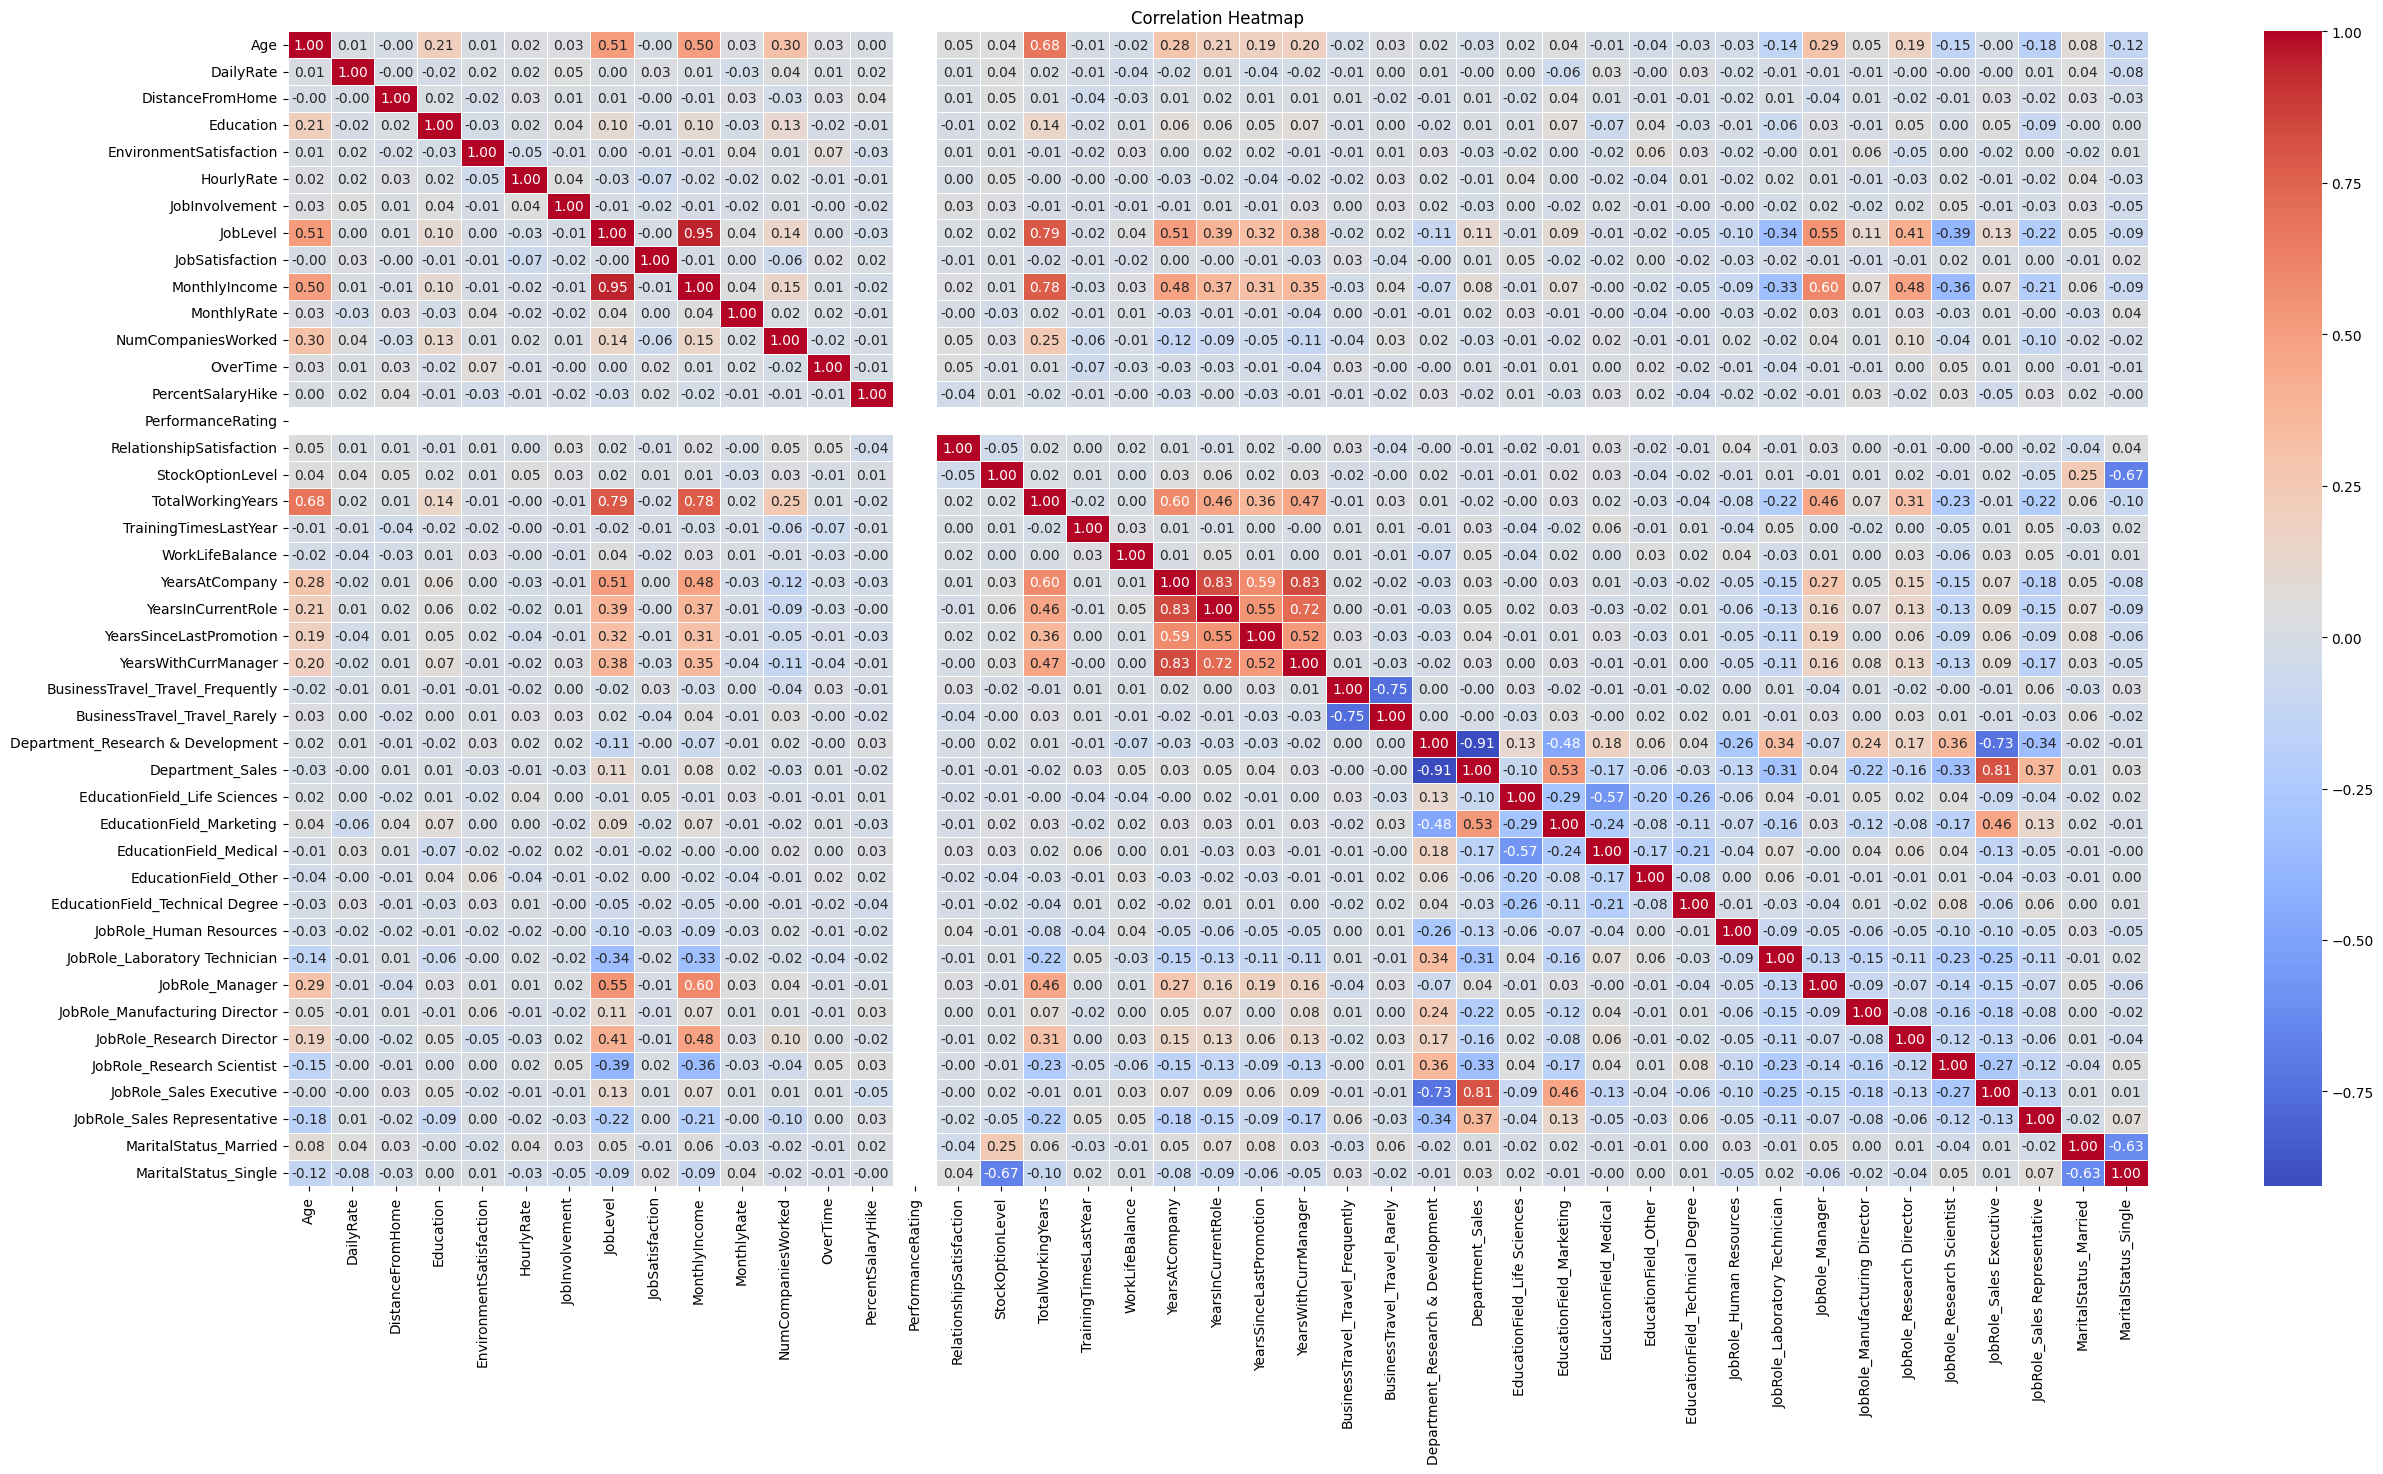

In [44]:
plt.figure(figsize=(30, 15))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Above we can see visually, but below we automate the process to find the variables to remove as the correlation is same**

In [45]:
corre=X.corr()

# Set the threshold of high correlation
threshold=0.9

#Iterate through out the upper traingle of the correlation matrix
for i in range(len(corre.columns)):
  for j in range(i):
    if corre.iloc[i,j]>=threshold:
      col1=corre.columns[i]
      col2=corre.columns[j]
      print(f"{col1} -> {col2}: {corre.iloc[i,j]:.2f}")


MonthlyIncome -> JobLevel: 0.95


**Create a derived feature like Income_per_level that helps to preserve the relationship between MonthlyIncome and JobLevel while removing multicollinearity.**

* Retains meaningful economic insight (e.g., how efficiently income scales with level)
* Avoids redundancy caused by high correlation (0.95)
* Keeps model simpler and more interpretable

In [46]:
# Create new feature
X['Income_per_Level'] = X['MonthlyIncome'] / X['JobLevel']

# Drop the original columns
X.drop(['MonthlyIncome', 'JobLevel'], axis=1, inplace=True)



In [47]:

print(len(X.columns))
print(X.columns)

42
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive

# **6. Train-Test Split**

In [48]:
print("Feature columns:",X.columns)
print(X.shape)
print("Target columns:",y.name)
print(y.shape)

Feature columns: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_S

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 42)
(294, 42)
(1176,)
(294,)


# **7. Check Data Imbalance**

Check Data Imbalance**

* If Imbalance exists, consider using SMOTE, Class Weights, or Undersampling/
Oversampling

In [50]:
print("Before SMOTE:")
print("Train class distribution:\n", y_train.value_counts(normalize=True))

Before SMOTE:
Train class distribution:
 Attrition
0    0.838435
1    0.161565
Name: proportion, dtype: float64


**Apply SMOTE to Training Data Only**

In [51]:
# As Data is Imbalanced, need to apply SMOTE for Balancing

from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=1.0, random_state=42)
X_train_resampled, y_train_resampled=smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print("Resampled Train class distribution:\n", y_train_resampled.value_counts(normalize=True))



After SMOTE:
Resampled Train class distribution:
 Attrition
0    0.5
1    0.5
Name: proportion, dtype: float64


In [52]:
# Create version for tree-based models (no scaling)
X_train_tree = X_train_resampled.copy()
X_test_tree = X_test.copy()

# **8. Data Scaling**


**Instead of applying Standardiation I'm choosing columns that are continuous(nunique>20)**

In [53]:
from sklearn.preprocessing import StandardScaler

scale_cols=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'Income_per_Level', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany']

X_train_linear = X_train_resampled.copy()
X_test_linear = X_test.copy()

scaler = StandardScaler()

X_train_linear[scale_cols] = scaler.fit_transform(X_train_linear[scale_cols])
X_test_linear[scale_cols] = scaler.transform(X_test_linear[scale_cols])


**To validate that standardization (scaling) is properly applied, especially after SMOTE, you can follow these quick checks:**

1. Check Mean ≈ 0 and Std ≈ 1 for Scaled Numerical Features

In [54]:
# Only check numerical columns
print("Means of standardized train data:\n", X_train_linear[scale_cols].mean())
print("\nStandard deviations of standardized train data:\n", X_train_linear[scale_cols].std())


Means of standardized train data:
 Age                 -2.882526e-16
DailyRate           -5.044421e-17
DistanceFromHome    -1.189042e-16
HourlyRate           2.107847e-16
Income_per_Level    -3.531095e-16
MonthlyRate         -1.297137e-16
TotalWorkingYears   -1.441263e-17
YearsAtCompany       2.882526e-17
dtype: float64

Standard deviations of standardized train data:
 Age                  1.000254
DailyRate            1.000254
DistanceFromHome     1.000254
HourlyRate           1.000254
Income_per_Level     1.000254
MonthlyRate          1.000254
TotalWorkingYears    1.000254
YearsAtCompany       1.000254
dtype: float64


**Validation Result:**

1. Means ≈ 0
  * All mean values are in the range of ~1e-16 to -1e-16 — these are practically zero in floating-point computation (normal due to numerical precision).
2. Standard Deviations ≈ 1
  * All standard deviations are 1.000254, which is perfectly acceptable. This small offset from 1.000000 is due to:
  * StandardScaler using population standard deviation (denominator n)
  * Floating-point rounding precision

# **9. Model Training**

**Let's start with simple baseline models and then with few stronger models**

### **A. Linear/Distance-Based Models**

* Logistic Regression
* SVC
* K-Nearest Neighbors
* GaussianNB

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score

In [56]:
linear_models={
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "SVM": SVC(probability=True, class_weight='balanced', random_state=42),  # probability=True for ROC AUC
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

def linear_models_fun(models, X_train, y_train, X_test, y_test):
  results = []

  for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results.append({
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1,
            "ROC-AUC": auc
        })

    print(classification_report(y_test, y_pred))

  return pd.DataFrame(results)

In [57]:
linear_results = linear_models_fun(linear_models, X_train_linear, y_train_resampled, X_test_linear, y_test)


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       247
           1       0.52      0.47      0.49        47

    accuracy                           0.85       294
   macro avg       0.71      0.69      0.70       294
weighted avg       0.84      0.85      0.84       294


--- SVM ---
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       247
           1       0.40      0.38      0.39        47

    accuracy                           0.81       294
   macro avg       0.64      0.64      0.64       294
weighted avg       0.81      0.81      0.81       294


--- K-Nearest Neighbors ---
              precision    recall  f1-score   support

           0       0.87      0.63      0.73       247
           1       0.21      0.51      0.29        47

    accuracy                           0.61       294
   macro avg       0.54      0.57      0.51       294
wei

In [ ]:
print(linear_results)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.846939   0.523810  0.468085  0.494382  0.728228
1                  SVM  0.809524   0.400000  0.382979  0.391304  0.723490
2  K-Nearest Neighbors  0.608844   0.206897  0.510638  0.294479  0.582781
3          Naive Bayes  0.571429   0.193798  0.531915  0.284091  0.586011


**Analyze the results:**

1. *Observations from Each Model:*
  * Class1 = Attrition = minority class
  * Recall and F1 Score here are critical, because detection of attrition is important
2. *Is the Data Learnable? -> YES*:
  * Logistic Reg:
    * High Accuracy (0.85)
    * ROC-AUC: ~0.73
    * F1-score for Attrition (0.49): decent — shows linear separability to some extent.
    * Conclusion: Data is learnable by a linear model — but not perfectly.
  * SVM:
   * Slightly worse than logistic regression. Suggests that hyperplane-based boundary isn't much better than linear.
  * KNN & Naive Bayes:
    * Poor recall and F1, especially precision for attrition class is low.
* However, class 1 recall is under 0.53 in all models → not good enough for business-critical predictions like Attrition.
3. *Problem with Current Models:*
  * Logistic Regression and SVM: Struggle with non-linear feature interactions. Do well on class 0, but consistently miss class 1 (minority).
  * KNN and Naive Bayes: Perform worse overall — likely underfitting or too sensitive to noise.
4. *Should You Try Tree-Based Models? → YES, 100%*
  * Handle non-linearities and interactions well.
  * Handle class imbalance with:
    * class_weight='balanced' (Random Forest)
    * scale_pos_weight (XGBoost, LightGBM)
  * Give better recall for minority classes when tuned properly.
  * Provide feature importance insights.



### **B. Tree-Based Models**

* Decision Tree
* Random Forest
* XGBoost

In [ ]:
tree_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=(len(y_train_resampled) / y_train_resampled.sum()) - 1, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(is_unbalance=True, random_state=42,n_estimators=100)
      }

def train_tree_models(models, X_train, y_train, X_test, y_test):
  tree_results = []

  for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    tree_results.append({
            "Model": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-Score": f1,
            "ROC-AUC": auc
        })

    print(classification_report(y_test, y_pred))

  return pd.DataFrame(tree_results)

In [ ]:
tree_results=train_tree_models(tree_models, X_train_tree, y_train_resampled, X_test_tree, y_test)



--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       247
           1       0.30      0.36      0.33        47

    accuracy                           0.76       294
   macro avg       0.59      0.60      0.59       294
weighted avg       0.78      0.76      0.77       294


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       247
           1       0.47      0.19      0.27        47

    accuracy                           0.84       294
   macro avg       0.67      0.58      0.59       294
weighted avg       0.80      0.84      0.81       294


--- XGBoost ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:20:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.88      0.97      0.92       247
           1       0.62      0.28      0.38        47

    accuracy                           0.86       294
   macro avg       0.75      0.62      0.65       294
weighted avg       0.83      0.86      0.83       294


--- LightGBM ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 986, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2800
[LightGBM] [Info] Number of data points in the train set: 1972, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.8

In [ ]:
print(tree_results)

           Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Decision Tree  0.761905   0.298246  0.361702  0.326923  0.599879
1  Random Forest  0.836735   0.473684  0.191489  0.272727  0.716384
2        XGBoost  0.857143   0.619048  0.276596  0.382353  0.732794
3       LightGBM  0.850340   0.565217  0.276596  0.371429  0.755190


**Understanding the Results of Tree-Based Models**

1. *Decision Tree:*
  * Precision (class 1):	0.30 → Only 30% of predicted attrition cases were actually attrition. High false positives.
  * Recall (class 1):	0.36 → Only 36% of actual attrition cases were detected.
  * F1-score:	0.33 → Poor balance between precision and recall.
  * ROC-AUC:	0.60 → Barely better than random (0.5).
  * Too simple to capture complex patterns. Likely underfitting.

2. *Random Forest:*
  * Precision (class 1):	0.47 → Better than DT. Still some false positives.
  * Recall (class 1):	0.19 → Missed 81% of actual attrition cases.
  * F1-score:	0.27 → Weak performance on class 1.
  * ROC-AUC:	0.71 → Better separation of classes. Promising.
  * Strong on majority class, weak on minority class (class imbalance effect).

3. *XGBoost:*
  * Precision (class 1):	0.62 → 62% of predicted attritions were correct. Good.
  * Recall (class 1):	0.28 → Still missed many real attritions.
  * F1-score:	0.38 → Improved over RF/DT.
  * ROC-AUC:	0.73 → Good class separation.
  * Best precision so far, but recall needs tuning.

4. *LightGBM:*
  * Precision (class 1):	0.57 → 57% of predicted attritions were correct, which is Good.
  * Recall (class 1):	0.28 → Still missed many real attritions.
  * F1-score:	0.37 → Improved over RF/DT.
  * ROC-AUC:	0.75 → Good class separation.
  * Best precision so far, but recall needs tuning.

**Summary:**

* XGBoost & LightGBM are your best performers overall, especially in:
  * Precision (few false positives)
  * ROC-AUC (class separation)

* Recall is consistently low → models struggle to detect all attrition cases.
* Decision Tree underperforms → skip for production.
* Random Forest has solid AUC but weak recall → tune further or use as ensemble base.










### **C. Cross-Validation Code for XGBoost & LightGBM**


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np

# Custom Scores
scorers={
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Fix feature names for LightGBM (replace whitespace)
X.columns = [col.replace(' ', '_') for col in X.columns]

# Evaluation function
def evaluate_model(model, X, y):
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  results = {}
  for name, scorer in scorers.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring=scorer)
    results[name] = (scores.mean(), scores.std())
  return results

# XGBoost (without deprecated 'use_label_encoder')
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_results = evaluate_model(xgb_model, X, y)

# LightGBM
lgb_model = LGBMClassifier(random_state=42)
lgb_results = evaluate_model(lgb_model, X, y)

# Print Results
def print_results(name, results):
    print(f"\n{name} Results:")
    for metric, (mean, std) in results.items():
        print(f"{metric.capitalize():<10}: {mean:.4f} ± {std:.4f}")

[LightGBM] [Info] Number of positive: 189, number of negative: 987
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1108
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160714 -> initscore=-1.652923
[LightGBM] [Info] Start training from score -1.652923
[LightGBM] [Info] Number of positive: 189, number of negative: 987
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1108
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160714 -> initscore=-1.652923
[LightGBM] [

In [ ]:
print_results("XGBoost", xgb_results)
print_results("LightGBM", lgb_results)


XGBoost Results:
Accuracy  : 0.8551 ± 0.0105
Precision : 0.6133 ± 0.0718
Recall    : 0.2827 ± 0.0285
F1        : 0.3862 ± 0.0369

LightGBM Results:
Accuracy  : 0.8660 ± 0.0063
Precision : 0.7086 ± 0.0423
Recall    : 0.2911 ± 0.0566
F1        : 0.4087 ± 0.0562


**LightGBM is the winner in this round:**
* Higher accuracy, precision, recall, and F1-score
* Lower standard deviation in most metrics → more consistent
* Better trade-off between false positives and false negatives

**Lets save the lgbm mode before hyperparameter tuning**

In [ ]:
import joblib

#Save the model
joblib.dump(lgb_model, 'lgbm_bhy_model.pkl')

print("LightGBM model before hyperparameter tuning saved as 'lgbm_bhy_model.pkl'")

LightGBM model before hyperparameter tuning saved as 'lgbm_bhy_model.pkl'


### **D. Hyperparameter tuning(Best model-LightGBM)**

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

param_dist = {
    'n_estimators': [100, 200],
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],               # deeper trees can learn complex patterns
    'num_leaves': [15, 31, 63, 127],           # should align with 2^max_depth
    'min_child_samples': [5, 10, 20, 30],    # regularization: min samples in leaf
    'subsample': [0.7, 0.8, 1.0],              # bagging (0.8 better for generalization)
    'colsample_bytree': [0.6, 0.8, 1.0],       # feature sampling
    'scale_pos_weight': [3, 5, 7, 10]  # very important for imbalanced data
}

lgbm = LGBMClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=50,                      # try 50 random combinations
    scoring='f1',                   # or 'roc_auc' if class separation is priority
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train_tree, y_train_resampled)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 986, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2800
[LightGBM] [Info] Number of data points in the train set: 1972, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.005, 0.01, 0.05,
                                                          0.1],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_child_samples': [5, 10, 20, 30],
                                        'n_estimators': [100, 200],
                                        'num_leaves': [15, 31, 63, 127],
                                        'scale_pos_weight': [3, 5, 7, 10],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=2)

**After Training**

In [ ]:
# Best Parameter and Evaluation

print("Best Parameters Found:")
print(random_search.best_params_)

print("\n Best CV F1 Score:")
print(random_search.best_score_)

# Evaluate on test set
best_lgbm = random_search.best_estimator_
y_pred = best_lgbm.predict(X_test_tree)
y_prob = best_lgbm.predict_proba(X_test_tree)[:, 1]

print("\n🧾 Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

Best Parameters Found:
{'subsample': 0.8, 'scale_pos_weight': 7, 'num_leaves': 127, 'n_estimators': 200, 'min_child_samples': 10, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.8}

 Best CV F1 Score:
0.8663974827784882

🧾 Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       247
           1       0.47      0.34      0.40        47

    accuracy                           0.83       294
   macro avg       0.68      0.63      0.65       294
weighted avg       0.82      0.83      0.82       294



**Key Takeaway:**

*Interpretation:*
* The recall increased from 28% → 34%, which is a positive outcome because you're now capturing more actual attrition cases (minority class).
* F1-score improved from 0.37 → 0.40 — this is critical in imbalanced datasets.
* Precision dropped slightly (normal when recall increases).
* Accuracy dropped a bit (from 85% → 83%), but this is acceptable as class 0 is dominant and we care more about minority class prediction.

**Hyperparameter tuning made your model more sensitive to class 1 (Attrition), which is your true goal.
This is a win — because F1 and Recall are more valuable in attrition detection than overall accuracy.**

**Save the Model**

In [ ]:
import joblib

#Save the model
joblib.dump(best_lgbm, 'lgbm_tuned_model.pkl')

print("LightGBM model after hyperparameter tuning saved as 'lgbm_tuned_model.pkl'")

LightGBM model after hyperparameter tuning saved as 'lgbm_tuned_model.pkl'


# **10. Check Bias-Variance tradeoff**

### **A. Train vs Test Score Gap**

In [ ]:
from sklearn.metrics import f1_score

# Predict on training data
y_train_pred = best_lgbm.predict(X_train_tree)
train_f1 = f1_score(y_train_resampled, y_train_pred)

# Predict on test data
y_test_pred = best_lgbm.predict(X_test_tree)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Training F1 Score: {train_f1:.4f}")
print(f"Test F1 Score    : {test_f1:.4f}")
print(f"F1 Gap           : {abs(train_f1 - test_f1):.4f}")

Training F1 Score: 1.0000
Test F1 Score    : 0.3951
F1 Gap           : 0.6049


### **B. Learning Curve Plot**

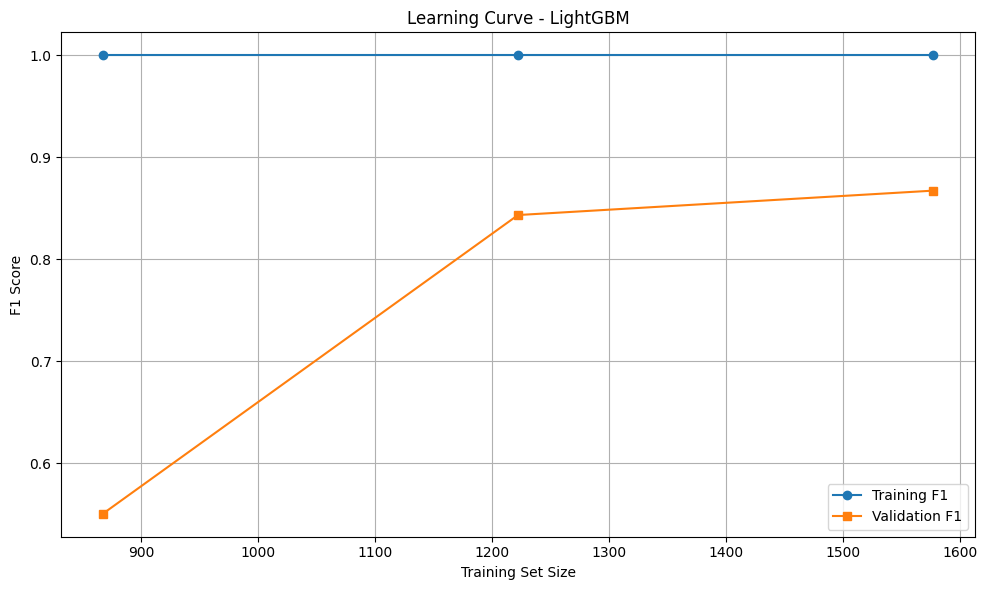

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    best_lgbm, X_train_tree, y_train_resampled,
    cv=5, scoring='f1', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    verbose=0
)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training F1', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Validation F1', marker='s')
plt.title('Learning Curve - LightGBM')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# **11. Feature Importance**



### **A. Analysis**

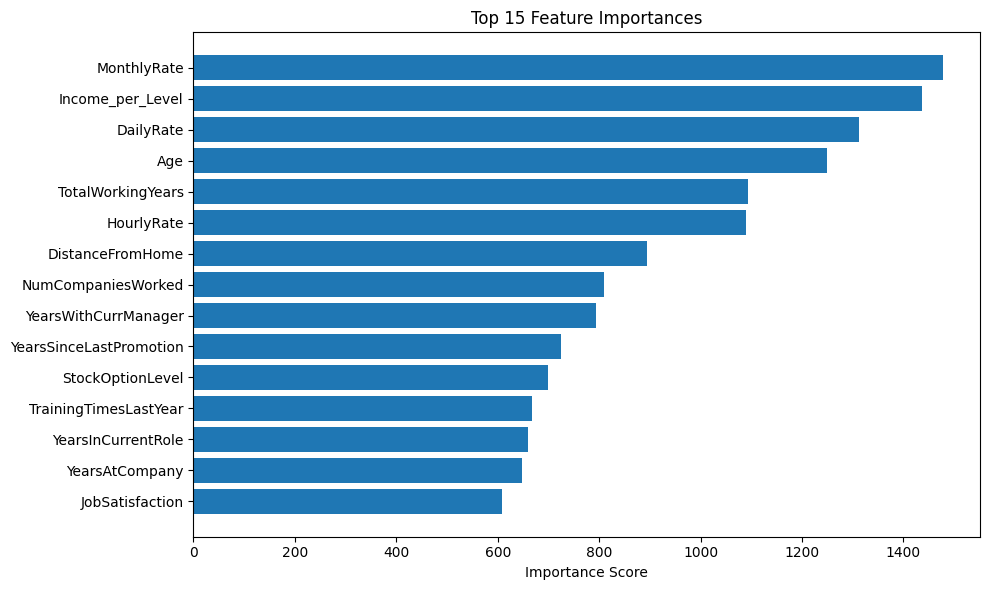

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:15], feature_importances['Importance'][:15])
plt.gca().invert_yaxis()
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

**Top 15 features**
1. *MonthlyRate*:	Higher or inconsistent pay may relate to attrition risk.
2.	*Income_per_Level*:	Ratio of income to job level → high/low mismatch indicates dissatisfaction.
3.	*DailyRate*:	Indicates workload or compensation inconsistencies.
4.	*Age*:	Younger employees may switch jobs more frequently.
5.	*TotalWorkingYears*:	Mid-experience employees are more likely to leave.
6.	*HourlyRate*:	Indicates overtime burden or underpayment.
7.	*DistanceFromHome*:	Long commutes → job dissatisfaction.
8.	*NumCompaniesWorked*:	Frequent job changes → potential attrition risk.
9.	*YearsWithCurrManager*:	Poor relationships with manager may drive exits.
10.	*YearsSinceLastPromotion*:	Long gaps without promotion signal disengagement.
11.	*StockOptionLevel*:	Low incentives tied to staying.
12.	*TrainingTimesLastYear*:	Low training → reduced growth → attrition.
13.	*YearsInCurrentRole*:	Stagnation in one role can push for change.
14.	*YearsAtCompany*:	High tenure can also indicate burnout.
15.	*JobSatisfaction*:	Directly affects retention — higher impact expected.

**Features like OverTime, JobRole, EnvironmentSatisfaction, WorkLifeBalance notably missing in Top 15.**

*This could be due to*:
* Correlation with higher-ranked numeric features
* One-hot encoded variables being split (like JobRole_Manager, etc.)
* Data imbalance hiding subtle effects

### **B. SHAP for Explainability**

In [ ]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(best_lgbm)
shap_values = explainer.shap_values(X_train_tree)

/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


In [ ]:
# Print the full shape and type:

print(type(shap_values))           # should be np.ndarray or list
print(shap_values.shape)           # full shape
print(shap_values[:5])             # sample values


<class 'numpy.ndarray'>
(1972, 42)
[[-3.93555961e-01 -2.74496692e-01 -2.48445267e-01 -4.46045647e-01
   3.30039227e-01  2.61662962e-02 -1.46442260e+00  3.25725043e-01
  -1.49038467e-01  3.28848358e-01 -3.32247912e-01 -8.93301554e-02
   0.00000000e+00 -4.74380425e-02 -2.39612957e+00 -8.10586970e-01
   1.47121363e-01 -3.87591494e-01 -7.44388174e-02 -1.12045623e-01
  -1.69025652e-01 -2.51681112e-01 -6.66734843e-03 -3.59155836e-01
   4.53757879e-01 -4.91105020e-01 -6.10247245e-01  1.87108909e-02
   9.12886032e-02  2.03194509e-02  2.27085594e-02  3.13981083e-02
  -7.00636740e-03 -1.26125178e+00  4.86099043e-02  2.44971642e-02
   1.71522089e-01  8.23726682e-02  4.12307538e-03  1.71332623e-01
   3.22997419e-02 -6.37669798e-01]
 [ 7.54383978e-01 -1.12135852e-01 -4.22611563e-01  9.50962049e-02
  -3.44332370e-01 -1.98818853e-01 -8.17029719e-02 -1.54982375e+00
  -2.74245391e-01 -1.76060338e+00 -4.06271484e-01 -5.92554694e-02
   0.00000000e+00 -2.59233131e-01 -1.64620800e+00  2.13415444e-01
   1.3

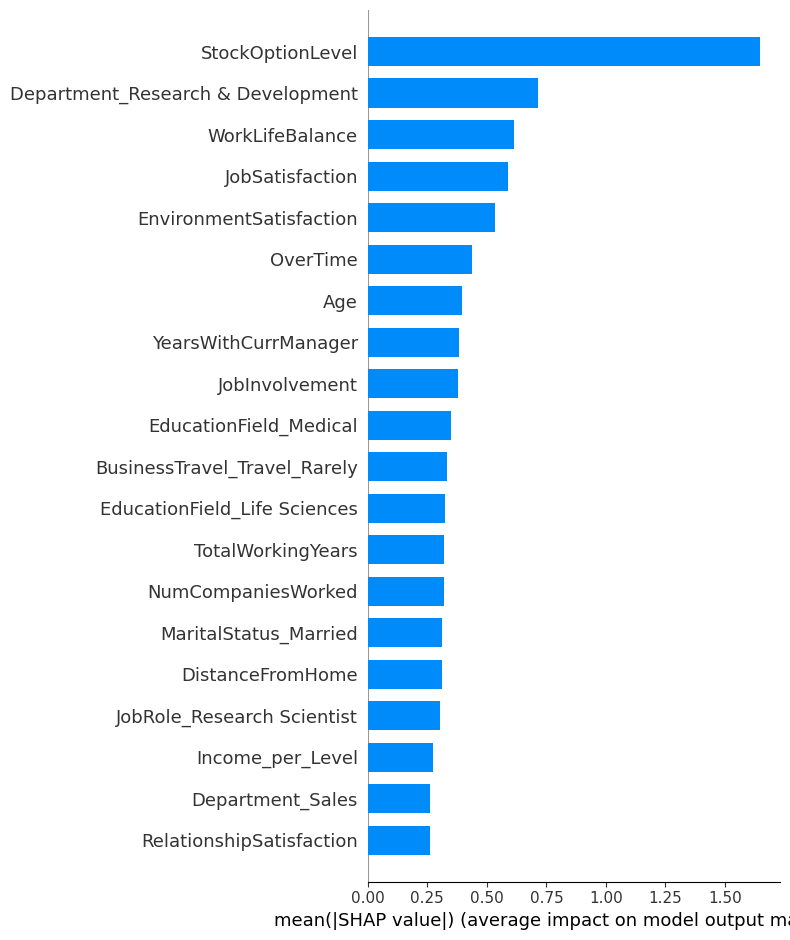

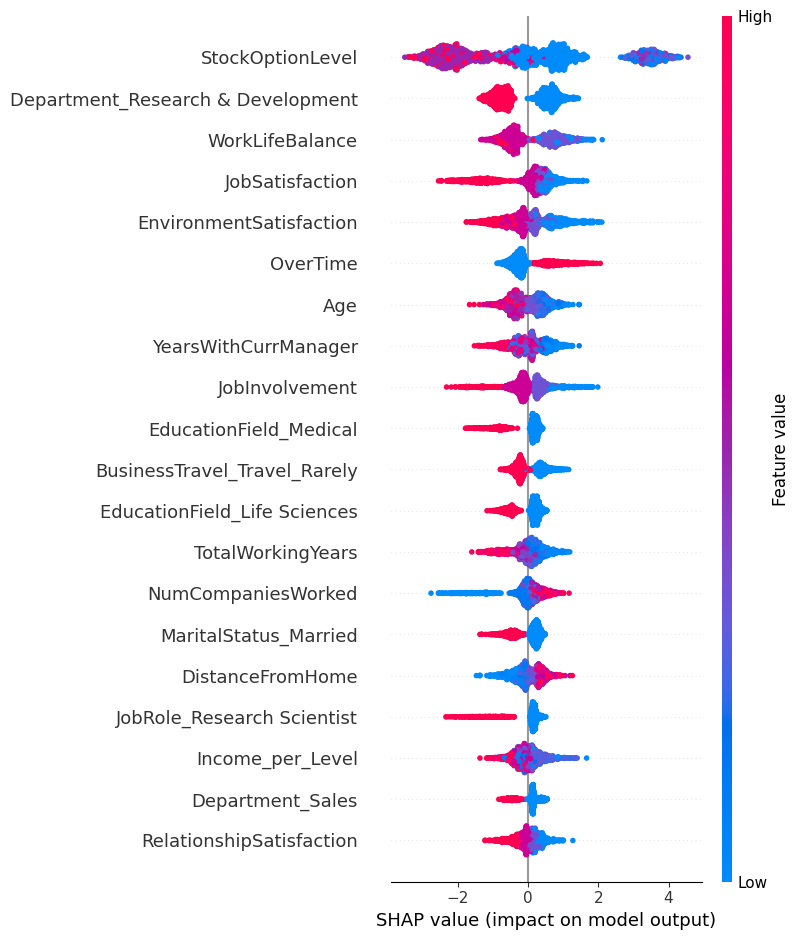

In [ ]:
shap.summary_plot(shap_values, X_train_tree, plot_type="bar")         # Feature importance bar
shap.summary_plot(shap_values, X_train_tree, plot_type="dot")         # Beeswarm plot (default)


**Want to Rank Top Drivers?**

In [ ]:
# Get mean absolute shap values
import numpy as np
shap_df = pd.DataFrame(
    np.abs(shap_values).mean(axis=0),
    index=X_train_tree.columns,
    columns=["mean_abs_shap"]
).sort_values(by="mean_abs_shap", ascending=False)

print(shap_df.head(15))  # Top 10 key attrition drivers


                                   mean_abs_shap
StockOptionLevel                        1.648356
Department_Research & Development       0.715652
WorkLifeBalance                         0.614385
JobSatisfaction                         0.588937
EnvironmentSatisfaction                 0.533947
OverTime                                0.437312
Age                                     0.395588
YearsWithCurrManager                    0.383769
JobInvolvement                          0.379874
EducationField_Medical                  0.350055
BusinessTravel_Travel_Rarely            0.330932
EducationField_Life Sciences            0.325771
TotalWorkingYears                       0.320612
NumCompaniesWorked                      0.318461
MaritalStatus_Married                   0.313811


# Load the pipeline
pipeline = joblib.load('lgbm_pipeline_final.pkl')

# Predict
prediction = pipeline.predict(new_employee)
probability = pipeline.predict_proba(new_employee)

print(f"Attrition Prediction: {'Yes' if prediction[0]==1 else 'No'}")
print(f"Attrition Probability: {probability[0][1]:.2f}")

In [ ]:
def preprocess_employee_data(df):
  df = df.copy()

  # Drop columns
  df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], inplace=True, errors='ignore')
  df.drop(columns=['Gender'], inplace=True, errors='ignore')

  # Map binary
  df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

  # Feature engineering
  df['Income_per_Level'] = df['MonthlyIncome'] / df['JobLevel']
  df.drop(['MonthlyIncome', 'JobLevel'], axis=1, inplace=True)

  # Outlier treatment
  numerical_cols = [
        'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
        'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyRate',
        'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
        'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
        'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
  ]
  for col in numerical_cols:
    if col in df.columns:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      df[col] = np.clip(df[col], Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

  # Encoding
  cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
  df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

  # Scaling
  scaler = StandardScaler()
  for col in numerical_cols:
    if col in df.columns:
      df[col] = scaler.fit_transform(df[[col]])

  return df



